In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 세부사항

- X 데이터와 Y 데이터가 하나의 파일(csv)에 있음
- 학습 데이터와 테스트 데이터의 비율은 80% : 20%
- 모든 데이터(컬럼,로우)를 학습에 사용할 필요는 없습니다.
- 실제 모델 결과보다 모델을 만들기까지의 과정이 중요합니다.
- 어떠한 논리로 분석을 진행하였는지 설명을 세부적으로 적어주시길 바랍니다.
- 머신러닝을 사용한 모델링 과정을 하나 이상 넣어 주시길 바랍니다.

# 차량 이미지 데이터 (Classification)

국내 차량 이미지 데이터를 보고 차량 클래스를 구분하는 모델을 만드시오.총 24,916개의 국산 차량 이미지 데이터가 있다.

활용 예: CCTV나 자율주행차 개발에서 주위 차량 Detection 모델

이미지는 30 x 30 x 3 짜리 이미지 가 픽셀 값으로 들어가 있고 마지막 컬럼에는 해당 차량의 클래스가 들어가 있다.

파일명 : kcar.pkl (압축 형식 : Gzip)

https://www.aihub.or.kr/aidata/130

평가 지표 : Accuracy

In [3]:
train = pd.read_pickle("/content/drive/My Drive/kcar.pkl", compression='gzip')
train.shape

(24916, 2701)

In [4]:
train.head() # 2700개의 픽셀과 1개의 라벨


# 2701번째가 이미지에 해당하는 라벨 >> 이미지를 플랫한 상태 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


In [8]:
# X와 y로 나누기
# X는 한 픽셀을 Feature로 잡은 것 입니다.
# y는 label입니다. 
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X.shape, y.shape

((24916, 2700), (24916,))

In [ ]:
#### lightgbm 용 데이터 split #####


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y


# 텍스트 라벨을 숫자로 바꿔줌 0~33 의 숫자로 바꿔줌 

array([ 0,  0,  0, ..., 33, 33, 33])

In [10]:
X = X.astype('int')
from sklearn.model_selection import train_test_split
X,X_del,y,y_del = train_test_split(X,y,test_size=0.5,random_state=1, stratify=y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1,stratify=y)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 1, stratify = y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 데이터를 분리해줌 2:8로 // stratify = y :: y를 기준으로 균등하게 짤려줌 train과 test가 

((7972, 2700), (2492, 2700), (7972,), (2492,))

In [11]:
X_train.dtypes

0       int64
1       int64
2       int64
3       int64
4       int64
        ...  
2695    int64
2696    int64
2697    int64
2698    int64
2699    int64
Length: 2700, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f556c82ba90>]],
      dtype=object)

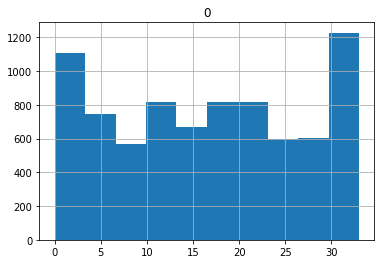

In [12]:
pd.DataFrame(y_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f556c71b1d0>]],
      dtype=object)

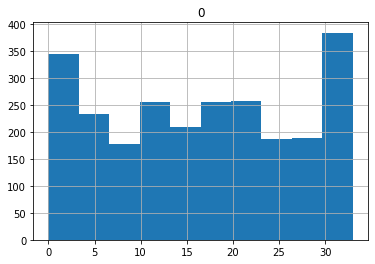

In [13]:
pd.DataFrame(y_test).hist()

In [ ]:
# 베이스 코드 
# 로지스틱 코드 (베이스코드) 

# 샘플 모델 3개 : Logistic Regression, SVC, Perceptron
def RunModel(model, X_train, y_train, X_test, y_test):
    clf = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return clf, pred

lr = LogisticRegression()
clf, y_pred = RunModel(lr, X_train, y_train, X_test, y_test)

svc = SVC()
clf_svc, y_pred_svc = RunModel(svc, X_train, y_train, X_test, y_test)

perc = Perceptron(tol=1e-3, random_state=0)
clf_perc, y_pred_perc = RunModel(perc, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
# lightgbm 데이터셋으로 변환 
import lightgbm as lgb
from lightgbm import LGBMRegressor
train_ds = lgb.Dataset(X_train, label = y_train) 
val_ds = lgb.Dataset(X_val, label = y_val)
test_ds = lgb.Dataset(X_test, label = y_test) 

In [17]:
best_score = 0
for max_depth_list in [10,30,50]:
    for learning_rate_list in [0.05,0.01,0.1]:
        for num_leaves_list in [50,100,150]:
            #for subsamples_list in [0.6,0.8]:
                for booster_type in ['gbdt']:
                    lgbm_reg = LGBMClassifier(n_estimators=400,  # 크면 과적합 / 클수록 train 적합 굿 
                                             booster = booster_type,
                                             learning_rate = learning_rate_list ,  # 작을수록 과적합 하려고 한다. 
                                             max_depth =  max_depth_list,    # 클수록 과적합 
                                             num_leaves = num_leaves_list,   # 클수록 과적합 
                                             objective = 'multiclass',
                                          #   subsamples = subsamples_list,
                                             silent = True,
                                             num_class = 34)
dd
                    lgbm_reg.fit(X_train, y_train)
                    predict_lgbm = lgbm_reg.predict(X_val).flatten()
                    test_accuracy = metrics.accuracy_score(y_val, predict_lgbm)  # 
                    if test_accuracy > best_score:
                              best_score = test_accuracy
                              best_hyperparameters = {'max_depth' : max_depth_list,
                                                    'learning_rate' : learning_rate_list,
                                                    'num_leaves' : num_leaves_list,
                                                   # 'subsamples' : subsamples_list,
                                                   # 'booster' : booster_type,
                                                    'test_accuracy' : test_accuracy}


KeyboardInterrupt: ignored

In [20]:
# print("최적파라미터 ㅣ ", best_hyperparameters)
lgbm_reg = LGBMClassifier(n_estimators=50,  
                         booster = 'gbdt',
                         feature_fraction = 0.8 ,
                         learning_rate = 0.05 ,  
                         subsamples = 0.6 ,
                         max_depth =  10 ,    
                         objective = 'multiclass',
                         silent = True,
                         random_state = 123,
                          num_class = 34)
lgbm_reg.fit(X_train, y_train)

LGBMClassifier(booster='gbdt', boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.05, max_depth=10,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=50, n_jobs=-1, num_class=34, num_leaves=31,
               objective='multiclass', random_state=123, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, subsamples=0.6)

In [23]:
predict_lgbm = lgbm_reg.predict(X_val).flatten()
test_accuracy = metrics.accuracy_score(y_val, predict_lgbm) 

In [24]:
test_accuracy

0.31344032096288865

In [15]:
from lightgbm import LGBMClassifier
from sklearn import metrics

정답: ['투싼']
모델 결과: ['팰리세이드']


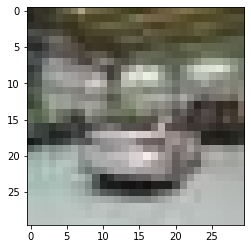

In [34]:
import random
t = random.randint(0, len(X_val)-1)
print("정답:", le.inverse_transform([predict_lgbm[100]]))
print("모델 결과:", le.inverse_transform([y_val[100]]))
plt.imshow(X_val.iloc[0].values.astype(np.int).reshape(30,30,3)) # (32,32,3)으로 변환

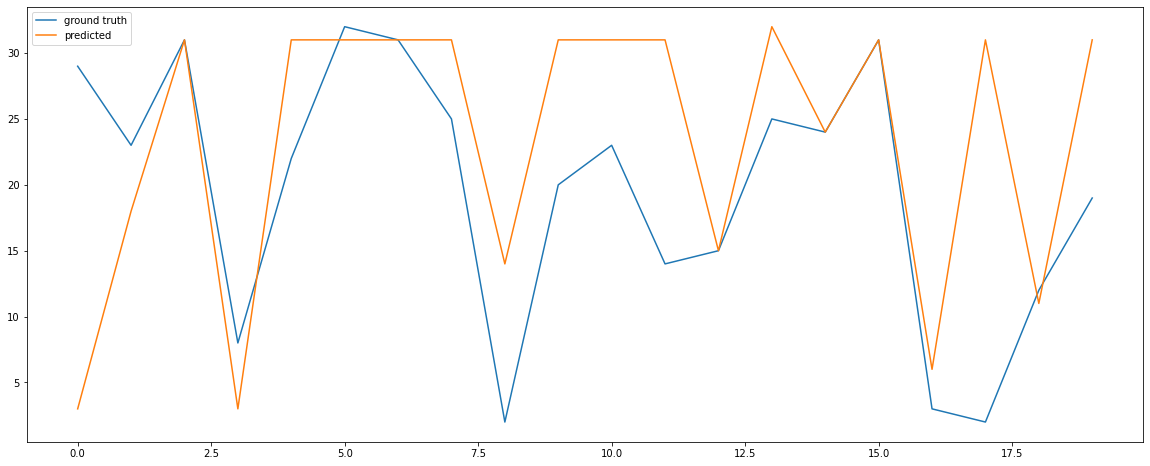

In [40]:
plt.rcParams['figure.figsize'] = [20, 8]

sample_range = 20
idx_start = 50
ground_truth = y_val[idx_start:idx_start+sample_range]
predicted = predict_lgbm[idx_start:idx_start+sample_range]
plt.plot(ground_truth)
plt.plot(predicted)
plt.legend(['ground truth', 'predicted'])
plt.show()

In [37]:
ground_truth

array([], dtype=int64)